# SECTION 2.2: Potential

In [1]:
import sys
import pickle
from numpy import *

import treal_functions
import slopes_functions
import prepare_functions

reload(treal_functions)
reload(slopes_functions)
reload(prepare_functions)

sim = ['g1.08e11'][0]
directory='/cs/sci/freundlich/CUSPCORE/Analysis/DATA/'
directory='/cs/sci/freundlich/CUSPCORE/Michael/' 

with open(directory+'NIHAO-%s.pickle'%sim[1:]) as f:
    gl = pickle.load(f)
 
gl = slopes_functions.derive_slopes(gl,polyorder=3,sigma = 21,mode= 'interp',double_smooth=False,rlim=[-2.,0.],use_fangzhou_Rvir=True)    
gl = prepare_functions.define_brho(gl,polyorder=3,sigma = 21,mode= 'interp',double_smooth=False,rlim=[-2.,0.],use_fangzhou_Rvir=True)
treal=treal_functions.load_or_create_gl(sim)

fitrange=prepare_functions.get_fitrange(gl)
gl=prepare_functions.reduce_range_gl(gl,fitrange)
treal=prepare_functions.reduce_range_Treal(treal,fitrange)

sys.path.insert(0, '/cs/sci/freundlich/CUSPCORE/Analysis/Model')
import cuspcore_aux
import cuspcore_plots
import evolving
import fitting as fit
reload(cuspcore_aux)
reload(cuspcore_plots)
reload(evolving)
reload(fit)

from cuspcore_aux import *
from cuspcore_plots import *
from evolving import *

a_array=[]

for (i,ss) in zip(range(size(gl)),gl):
    a_array.append(ss['a'])           

a_array=array(a_array)

ok_fangzhou,r12_fangzhou,rvir_fangzhou,mvir_fangzhou=get_fangzhou_radii(sim,a_array,get_all=False)
gl=fit.do_fits(gl,rvir_fangzhou,mvir_fangzhou,1.,0.01,2.,components=['d'])

print 'Done'


/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:33: RuntimeWarning: invalid value encountered in greater_equal
  r_range=where((log10(r/Rvir)>=rlim[0])&(log10(r/Rvir)<rlim[1]))
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:33: RuntimeWarning: invalid value encountered in less
  r_range=where((log10(r/Rvir)>=rlim[0])&(log10(r/Rvir)<rlim[1]))
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:42: RuntimeWarning: invalid value encountered in divide
  dM = M/sqrt(cumsum(n))
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:46: RuntimeWarning: divide by zero encountered in log10
  logrho=log10(rho)
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:79: RuntimeWarning: divide by zero encountered in log10
  logsigmar = log10(sigmar)
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/slopes_functions.py:80: RuntimeWarning: divide by zero encountered in log10
  logsigmar2 = 2*log10(sigmar)
/cs/sci/freundlich/CU

 
Loading existing file Treal-1.08e11.pickle


/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/prepare_functions.py:123: RuntimeWarning: invalid value encountered in less_equal
  outer = r <= Rvir
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/prepare_functions.py:124: RuntimeWarning: invalid value encountered in greater
  conv  = r > 0.01*Rvir
/cs/sci/freundlich/CUSPCORE/Analysis/Preparing/prepare_functions.py:125: RuntimeWarning: invalid value encountered in greater_equal
  soft  = r >= eps


Reducing the range of gl
Reducing the range of Treal


/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Done


In [2]:
# COMPARE -GM/r and U

from matplotlib.pylab import *
G = 4.499753324353496e-06 # gravitational constant [kpc^3 Gyr^-2 Msun^-1]

rlim=[-2.,0.]
component='d'
tmin=2.
axlim=array([-2.,1.,-1.,1.])

parsec=3.085677581e16 #m
year=3.1557600e7 #s
kms_to_kpcGyr=1/parsec*year*1e9

x=logspace(-2,1,1000)
c=10.
mu=log(1+c)-c/(1+c)
Ep1=-1/mu*(1/x*log(1+c*x)-c/(1+c))
Ep2=-1/x
Epfid=-1/x*(log(1+c*x)-c*x/(1+c*x))/mu


In [3]:
# FIGURE PROPERTIES

fontsize=20
legendsize=fontsize
linewidth=2
linesize=5
ticksize=fontsize-4
figsize=(8,16)

rcParams['axes.linewidth'] = 1
rcParams['xtick.major.size'] = 6
rcParams['xtick.major.width'] = 1
rcParams['xtick.minor.size'] = 3
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 6
rcParams['ytick.major.width'] = 1
rcParams['ytick.minor.size'] = 3
rcParams['ytick.minor.width'] = 1
rcParams['xtick.labelsize'] = fontsize
rcParams['ytick.labelsize'] = fontsize

rcParams['figure.subplot.left']=0.15
rcParams['figure.subplot.right']=0.95
rcParams['figure.subplot.bottom']=0.15
rcParams['figure.subplot.top']=0.95
rcParams['figure.subplot.wspace']=0.1
rcParams['figure.subplot.hspace']=0.1


[None, None, None, None, None, None, None]

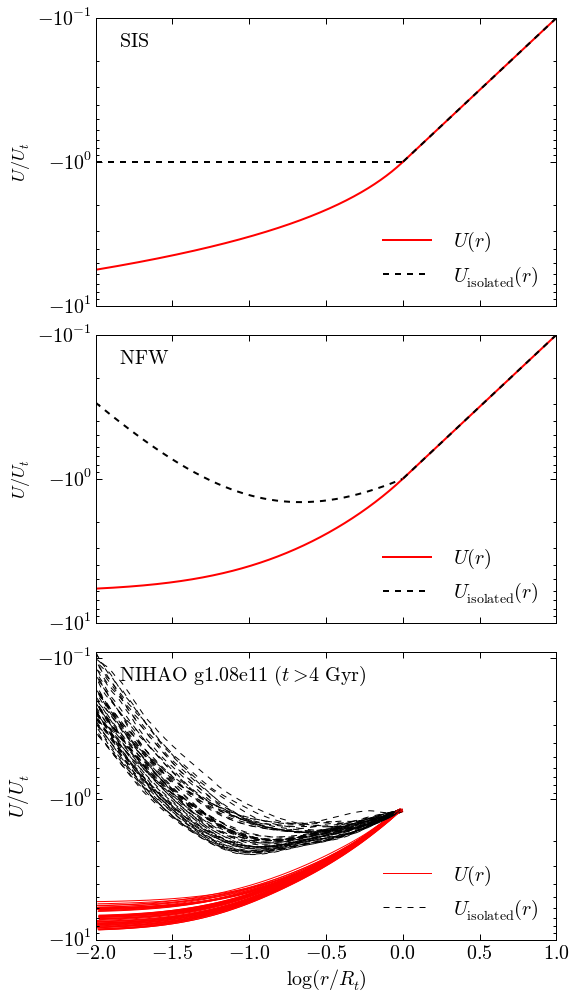

In [4]:

# SHARE AXIS

logx=log10(x)

fig=subplots(figsize=figsize,squeeze=False)
clf()

ax1 = plt.subplot(311)
ax1.plot(logx[x>1],1/x[x>1],'r',linewidth=2,label=r'$U(r)$')
ax1.plot(logx[x<1],1-log(x[x<1]),'r',linewidth=2)
ax1.plot(logx[x>1],1/x[x>1],'k--',linewidth=2)
ax1.plot(logx[x<1],ones_like(x[x<1]),'k--',linewidth=2,label=r'$U_{\rm isolated}(r) $')
axis(axlim)
yscale('log')
ax1.invert_yaxis()
legend(loc='lower right',fontsize=legendsize,frameon=False,handlelength=3)
ax1.text(0.05,0.9,r'$\rm SIS$',fontsize=fontsize,transform=ax1.transAxes)
yticknames=['$-10^{%i}$'%int(log10(item)) for item in logspace(-1,1,3)]
yticks(logspace(-1,1,3),yticknames)
ylabel(r'$U/U_t$')#,fontsize=fontsize)

ax2 = plt.subplot(312, sharex=ax1)
ax2.plot(logx[x>1],-Ep2[x>1],'r',linewidth=2,label=r'$U(r)$')
ax2.plot(logx[x<1],-Ep1[x<1],'r',linewidth=2)#,label=r'$E_p = -\frac{GM_t}{R_t}\frac{\frac{R_t}{r} \ln(1+c\frac{r}{R_t})-\frac{c}{1+c}}{\ln(1+c)-\frac{c}{1+c}}$')
ax2.plot(logx[x>1],-Ep2[x>1],'k--',linewidth=2)
ax2.plot(logx[x<1],-Epfid[x<1],'k--',linewidth=2,label=r'$U_{\rm isolated}(r)$')
axis(axlim)
yscale('log')
ax2.invert_yaxis()
legend(loc='lower right',fontsize=legendsize,frameon=False,handlelength=3)
ax2.text(0.05,0.9,r'$\rm NFW$',fontsize=fontsize,transform=ax2.transAxes)
yticknames=['$-10^{%i}$'%int(log10(item)) for item in logspace(-1,1,3)]
yticks(logspace(-1,1,3),yticknames)
ylabel(r'$U/U_t$')#,fontsize=fontsize)

ax3 = plt.subplot(313, sharex=ax1)
counter=0
for (ss, i) in zip(gl, range(size(gl))):
    
    r= ss[component]['r']
    Rvir=ss['Rvir']
    Mvir=ss[component]['Mvir']
    Uvir=G*Mvir/Rvir
    logr=log10(ss[component]['r']/ss['Rvir'])
    t=ss['t']
    
    logr=log10(r/Rvir)
    
    Utot=treal_functions.Utot(ss,r)
    Uin=treal_functions.Uin(ss,r)
    DU=(Utot-Uin)/Uin
    
    if t>tmin:
        Ut=abs(Uin[-1])
        if counter==0:
            ax3.plot(logr,-Utot/Uvir,color='r',label=r'$U(r)$')
            ax3.plot(logr,-Uin/Uvir,color='k',linestyle='--',label=r'$U_{\rm isolated}(r)$')
        else:
            ax3.plot(logr,-Utot/Uvir,color='r')
            ax3.plot(logr,-Uin/Uvir,color='k',linestyle='--')
        
        counter=counter+1
        
xlabel(r'$\log(r/R_{t})$',fontsize=fontsize)
ylabel(r'$U/U_t$',fontsize=fontsize) #$\rm [kpc^2 Gyr^{-2}]$
legend(fontsize=legendsize,frameon=False,loc='lower right',handlelength=3)

axis(axlim)
yscale('log')
ax3.invert_yaxis()
ax3.text(0.05,0.9,r'$\rm NIHAO$ $\rm g1.08e11$ $(t>\rm 4$ $\rm Gyr)$',fontsize=fontsize,transform=ax3.transAxes)
yticknames=['$-10^{%i}$'%int(log10(item)) for item in logspace(-1,1,3)]
yticks(logspace(-1,1,3),yticknames)

xticknames=['$%.1f$'%log10(item) for item in logspace(-2,1,7)]
xticks(log10(logspace(-2,1,7)),xticknames)

ax3.set_xticklabels(xticknames)
setp(ax1.get_xticklabels(), visible=False)
setp(ax2.get_xticklabels(), visible=False)


[None, None, None, None, None, None, None]

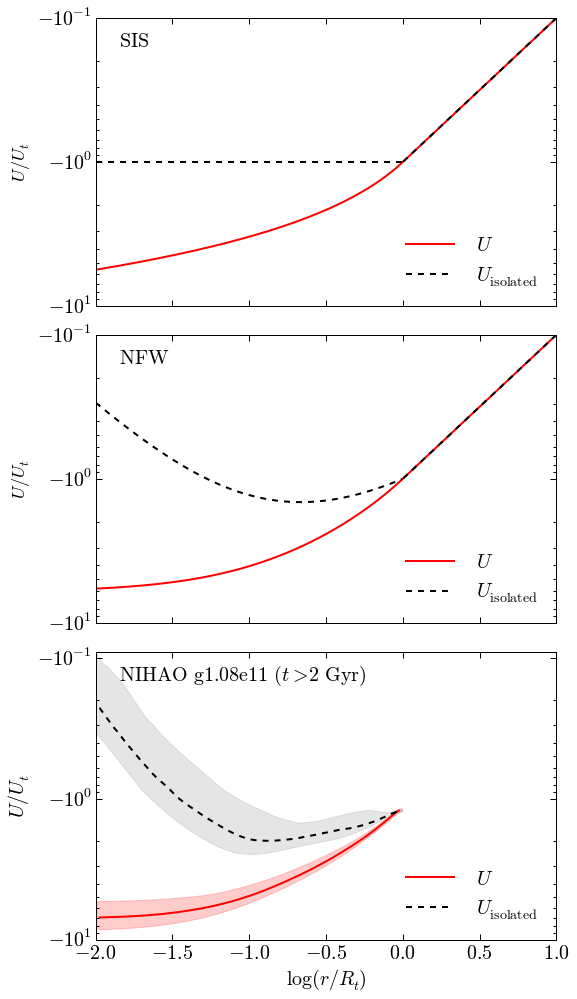

In [7]:
# SHARE AXIS
alpha_fill=0.2

logx=log10(x)

fig=subplots(figsize=figsize,squeeze=False)
clf()

ax1 = plt.subplot(311)
ax1.plot(logx[x>1],1/x[x>1],'r',linewidth=2,label=r'$U$')
ax1.plot(logx[x<1],1-log(x[x<1]),'r',linewidth=2)
ax1.plot(logx[x>1],1/x[x>1],'k--',linewidth=2)
ax1.plot(logx[x<1],ones_like(x[x<1]),'k--',linewidth=2,label=r'$U_{\rm isolated} $')
axis(axlim)

yscale('log')
ax1.invert_yaxis()
legend(loc='lower right',fontsize=legendsize,frameon=False,handlelength=3)
ax1.text(0.05,0.9,r'$\rm SIS$',fontsize=fontsize,transform=ax1.transAxes)
yticknames=['$-10^{%i}$'%int(log10(item)) for item in logspace(-1,1,3)]
yticks(logspace(-1,1,3),yticknames)
ylabel(r'$U/U_t$')#,fontsize=fontsize)

ax2 = plt.subplot(312, sharex=ax1)
ax2.plot(logx[x>1],-Ep2[x>1],'r',linewidth=2,label=r'$U$')
ax2.plot(logx[x<1],-Ep1[x<1],'r',linewidth=2)#,label=r'$E_p = -\frac{GM_t}{R_t}\frac{\frac{R_t}{r} \ln(1+c\frac{r}{R_t})-\frac{c}{1+c}}{\ln(1+c)-\frac{c}{1+c}}$')
ax2.plot(logx[x>1],-Ep2[x>1],'k--',linewidth=2)
ax2.plot(logx[x<1],-Epfid[x<1],'k--',linewidth=2,label=r'$U_{\rm isolated}$')
axis(axlim)

yscale('log')
ax2.invert_yaxis()
legend(loc='lower right',fontsize=legendsize,frameon=False,handlelength=3)
ax2.text(0.05,0.9,r'$\rm NFW$',fontsize=fontsize,transform=ax2.transAxes)
yticknames=['$-10^{%i}$'%int(log10(item)) for item in logspace(-1,1,3)]
yticks(logspace(-1,1,3),yticknames)
ylabel(r'$U/U_t$')#,fontsize=fontsize)

ax3 = plt.subplot(313, sharex=ax1)

abscisse=log10(logspace(-2,0,1000))
Utot_curve=[]
Uin_curve=[]

for (ss, i) in zip(gl, range(size(gl))):
    
    r= ss[component]['r']
    Rvir=ss['Rvir']
    Mvir=ss[component]['Mvir']
    Uvir=G*Mvir/Rvir
    logr=log10(ss[component]['r']/ss['Rvir'])
    t=ss['t']
    
    logr=log10(r/Rvir)
    
    Utot=treal_functions.Utot(ss,r)
    Uin=treal_functions.Uin(ss,r)
    DU=(Utot-Uin)/Uin
    
    p=ss['d']['lsfit_brho_b2_g3_unconstrained']['p']
    Udekel=prf.U(r, p, 'an')
    
    DU=(Utot-Udekel)/Udekel
    
    if t>tmin:
        Ut=abs(Uin[-1])
        Utot_curve.append(list(interp(abscisse,logr,-Utot/Uvir,left=nan,right=nan)))
        Uin_curve.append(list(interp(abscisse,logr,-Uin/Uvir,left=nan,right=nan)))

Utot_curve=array(Utot_curve)
Uin_curve=array(Uin_curve)

Utot_min=nan*ones_like(abscisse)
Utot_max=nan*ones_like(abscisse)
Utot_med=nan*ones_like(abscisse)
Utot_std=nan*ones_like(abscisse)
Uin_min=nan*ones_like(abscisse)
Uin_max=nan*ones_like(abscisse)
Uin_med=nan*ones_like(abscisse)
Uin_std=nan*ones_like(abscisse)
for i in range(size(abscisse)):
    try:
        Utot_min[i]=amin(array_nonan(Utot_curve[:,i]))
        Utot_max[i]=amax(array_nonan(Utot_curve[:,i]))
        Utot_med[i]=median((Utot_curve[:,i]))
        Utot_std[i]=std(log10(Utot_curve[:,i]))
    except:
        continue
    try:
        Uin_min[i]=amin(array_nonan(Uin_curve[:,i]))
        Uin_max[i]=amax(array_nonan(Uin_curve[:,i]))
        Uin_med[i]=median((Uin_curve[:,i]))  
        Uin_std[i]=std(log10(Utot_curve[:,i]))
    except:
        continue

fill_between(abscisse,Utot_min,Utot_max,color='r',alpha=alpha_fill)
plot(abscisse,Utot_med,color='r',lw=2,label=r'$U$')

fill_between(abscisse,Uin_min,Uin_max,color='gray',alpha=alpha_fill)
plot(abscisse,Uin_med,lw=2,color='k',ls='dashed',label=r'$U_{\rm isolated}$')

xlabel(r'$\log(r/R_{t})$',fontsize=fontsize)
ylabel(r'$U/U_t$',fontsize=fontsize) #$\rm [kpc^2 Gyr^{-2}]$
legend(fontsize=legendsize,frameon=False,loc='lower right',handlelength=3)

axis(axlim)
yscale('log')
ax3.invert_yaxis()
ax3.text(0.05,0.9,r'$\rm NIHAO$ $\rm g1.08e11$ $(t>\rm %.0f$ $\rm Gyr)$'%tmin,fontsize=fontsize,transform=ax3.transAxes)
yticknames=['$-10^{%i}$'%int(log10(item)) for item in logspace(-1,1,3)]
yticks(logspace(-1,1,3),yticknames)

xticknames=['$%.1f$'%log10(item) for item in logspace(-2,1,7)]
xticks(log10(logspace(-2,1,7)),xticknames)

ax3.set_xticklabels(xticknames)
setp(ax1.get_xticklabels(), visible=False)
setp(ax2.get_xticklabels(), visible=False)
